In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
import os

if os.path.isdir('/media/home/team_workspaces'):

    from astroquery.esa.euclid.core import EuclidClass, Euclid

    # change to your username
    Euclid.login(user='mwalms01')

    repo_dir = '/media/home/team_workspaces/Galaxy-Zoo-Euclid'
    
else:
    repo_dir = '/home/walml/repos/gz-euclid-datalab'

INFO:astroquery:Login to Euclid TAP server


INFO: Login to Euclid TAP server [astroquery.esa.euclid.core]


Password:  ········


INFO:astroquery:OK
INFO:astroquery:Login to Euclid data service
INFO:astroquery:OK
INFO:astroquery:Login to Euclid cutout service


INFO: OK [astroquery.utils.tap.core]
INFO: Login to Euclid data service [astroquery.esa.euclid.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to Euclid cutout service [astroquery.esa.euclid.core]


INFO:astroquery:OK


INFO: OK [astroquery.utils.tap.core]


In [129]:
# %pip install omegaconf

In [130]:
# %pip install -e {repo_dir}from omegaconf import OmegaConf
from omegaconf import OmegaConf

import bulk_download_of_tiles_and_catalogs as bd
cfg = OmegaConf.load(repo_dir + '/run_pipeline/v3_challenge_midaug.yaml')
cfg = bd.create_folders(cfg)

import create_master_catalog_and_cutouts as cc

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='VIS Mag', ylabel='Segmentation area (VIS pixels)'>)

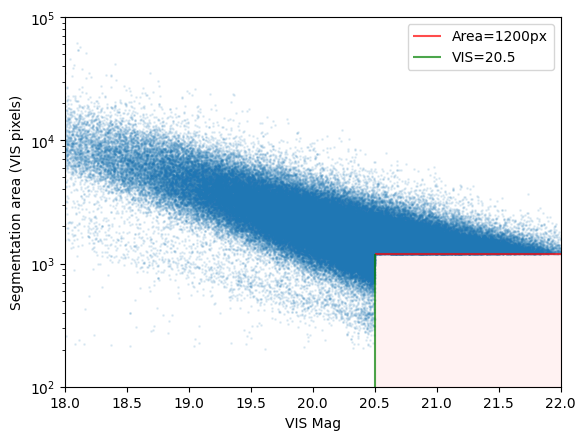

In [136]:

master_catalog = cc.make_galaxy_catalog(cfg)
# master_catalog = pd.read_csv(cfg.catalog_dir + '/_master_catalog.csv')

cc.visualise_catalog(cfg, master_catalog)
# make_volunteer_cutouts(master_catalog)
# make_fits_cutouts(master_catalog)


In [137]:
len(master_catalog)

170886

In [138]:
master_catalog['this_tile_index_is_best'].dropna().mean()

0.8835715038095573

In [139]:
master_catalog['object_id'].value_counts()

object_id
-823709319447589174    3
-917017329487465569    3
-717440735452605577    3
-916981224487345106    3
-750447336507645497    3
                      ..
-767083295472931048    1
-767076267476753473    1
-767074467476833965    1
-767066984476777856    1
-912984453290145085    1
Name: count, Length: 167529, dtype: int64

In [140]:
master_catalog.query('this_tile_index_is_best')['object_id'].value_counts()

object_id
-852256544600754599    1
-796508794414585232    1
-796589164417252351    1
-796586019415193988    1
-796569084413580822    1
                      ..
-769319938475837416    1
-769319856476123315    1
-769310544473497225    1
-769306755475746724    1
-913149861288259131    1
Name: count, Length: 150990, dtype: int64

In [143]:
tiles_to_skip = [
    102015620, 102021061, 102016036, 102021034, 102015615, 102034406,
   102012400, 102013966, 102026083, 102011655, 102027664, 102033849,
   102020090, 102023521, 102018234, 102019150, 102027661, 102016463,
   102022002, 102030421, 102021511, 102031525, 102026603, 102030405,
   102022988, 102016054, 102018712, 102022015, 102022017, 102021057,
   102022027, 102032104, 102028219, 102028213, 102034444, 102032115,
   102022990, 102031550, 102032117, 102022013, 102036817, 102018254,
   102025018, 102023993, 102027667, 102028753, 102029879, 102030997,
   102026063, 102035627
]  # already upoaded, no need to remake cutouts
master_catalog = master_catalog[~master_catalog['tile_index'].isin(tiles_to_skip)].reset_index(drop=True)

In [144]:
# master_catalog['tile_index'].value_counts()
len(master_catalog)

160622

In [145]:
# master_catalog['in_tile_overlap_region'].value_counts()

In [146]:
# master_catalog['in_tile_overlap_region'].isna().sum()

In [147]:
# cutout_catalog = master_catalog[master_catalog['in_tile_overlap_region'] == False]
cutout_catalog = master_catalog.query('this_tile_index_is_best')
assert cutout_catalog['object_id'].value_counts().max() == 1
len(cutout_catalog)

141788

In [148]:
cc.make_volunteer_cutouts(cutout_catalog)

loading tile


KeyboardInterrupt: 

In [149]:
!du -sh {cfg.catalog_dir}

269M	/media/home/team_workspaces/Galaxy-Zoo-Euclid/data/pipeline/v3_challenge_midaug/catalogs


In [150]:
!du -sh {cfg.tile_dir}

595G	/media/home/team_workspaces/Galaxy-Zoo-Euclid/data/pipeline/v3_challenge_midaug/tiles


In [151]:
!du -sh {cfg.cutout_dir}

^C


In [152]:
cc.zip_for_download(cfg)